In [15]:
from scipy.stats import kendalltau as kTau
import matplotlib.pyplot as plt

# from sklearn.externals.joblib import Memory
# memory = Memory(cachedir='/tmp',verbose=0)

import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

# %autonotify -a 30

<IPython.core.display.Javascript object>

In [16]:
# This is probably unnecesary ¯\_(ツ)_/¯
def ODF2DF(GP_ODF):
    GP_ODF = GP_ODF[['Rank','Feature']]
    GP_ODF.sort_values('Rank', inplace=true)
    GP_ODF.set_index('Rank', inplace=True)
    return GP_ODF

# Data

* GCT file: [all_aml_test.gct](https://software.broadinstitute.org/cancer/software/genepattern/data/all_aml/all_aml_test.gct).
* CLS file: [all_aml_test.cls](https://software.broadinstitute.org/cancer/software/genepattern/data/all_aml/all_aml_test.cls).


# Using CMS: Gold Standard

In [6]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.GPAuthWidget(genepattern.register_session("https://genepattern.broadinstitute.org/gp", "", ""))

GPAuthWidget()

In [7]:
comparativemarkerselection_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00044')
comparativemarkerselection_job_spec = comparativemarkerselection_task.make_job_spec()
comparativemarkerselection_job_spec.set_parameter("input.file", "https://software.broadinstitute.org/cancer/software/genepattern/data/all_aml/all_aml_test.gct")
comparativemarkerselection_job_spec.set_parameter("cls.file", "https://software.broadinstitute.org/cancer/software/genepattern/data/all_aml/all_aml_test.cls")
comparativemarkerselection_job_spec.set_parameter("confounding.variable.cls.file", "")
comparativemarkerselection_job_spec.set_parameter("test.direction", "2")
comparativemarkerselection_job_spec.set_parameter("test.statistic", "0")
comparativemarkerselection_job_spec.set_parameter("min.std", "")
comparativemarkerselection_job_spec.set_parameter("number.of.permutations", "10000")
comparativemarkerselection_job_spec.set_parameter("log.transformed.data", "false")
comparativemarkerselection_job_spec.set_parameter("complete", "false")
comparativemarkerselection_job_spec.set_parameter("balanced", "false")
comparativemarkerselection_job_spec.set_parameter("random.seed", "779948241")
comparativemarkerselection_job_spec.set_parameter("smooth.p.values", "true")
comparativemarkerselection_job_spec.set_parameter("phenotype.test", "one versus all")
comparativemarkerselection_job_spec.set_parameter("output.filename", "<input.file_basename>.comp.marker.odf")
genepattern.GPTaskWidget(comparativemarkerselection_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00044')

In [8]:
job1587350 = gp.GPJob(genepattern.get_session(0), 1587350)
genepattern.GPJobWidget(job1587350)

GPJobWidget(job_number=1587350)

In [17]:
# The code below will only run if pandas is installed: http://pandas.pydata.org
from gp.data import ODF
all_aml_test_comp_marker_odf_1587350 = ODF(job1587350.get_file("all_aml_test.comp.marker.odf"))
all_aml_test_comp_marker_odf_1587350

,Rank,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,ALL Mean,ALL Std,AML Mean,AML Std,k
0,1,M89957_at,IGB Immunoglobulin-associated beta (B29),8.335325,0.0002,0.00000,0.000299,0.011590,0.010518,1.0,0.0000,0.0000,-5.856628,2011.333333,1200.105468,-343.428571,396.421049,0
1,2,J05243_at,"SPTAN1 Spectrin, alpha, non-erythrocytic 1 (al...",7.305599,0.0002,0.00000,0.000299,0.011590,0.010518,1.0,0.0001,0.0001,3.773193,718.523810,299.612186,190.428571,115.366783,0
2,3,M11722_at,Terminal transferase mRNA,7.287828,0.0002,0.00000,0.000299,0.011590,0.010518,1.0,0.0001,0.0001,70.797073,5067.047619,3134.301939,71.571429,169.242073,0
3,4,M31523_at,TCF3 Transcription factor 3 (E2A immunoglobuli...,7.285013,0.0002,0.00000,0.000299,0.011590,0.010518,1.0,0.0001,0.0001,4.714167,1488.666667,720.431352,315.785714,129.907765,0
4,5,M84371_rna1_s_at,CD19 gene,7.249615,0.0002,0.00000,0.000299,0.011590,0.010518,1.0,0.0001,0.0001,3.475639,1929.476190,807.017820,555.142857,262.578005,0
5,7,D88270_at,GB DEF = (lambda) DNA for immunoglobin light c...,6.464445,0.0002,0.00000,0.000299,0.011590,0.010518,1.0,0.0012,0.0012,59.118573,4024.285714,2802.251811,68.071429,92.032991,0
6,8,U05259_rna1_at,MB-1 gene,6.425300,0.0002,0.00000,0.000299,0.011590,0.010518,1.0,0.0012,0.0012,10.178065,5177.000000,3281.358271,508.642857,460.668011,0
7,9,M92287_at,CCND3 Cyclin D3,6.389370,0.0002,0.00000,0.000299,0.011590,0.010518,1.0,0.0014,0.0014,5.087627,4570.142857,2573.249391,898.285714,457.413200,0
8,11,U29175_at,Transcriptional activator hSNF2b,6.106756,0.0002,0.00000,0.000299,0.011590,0.010518,1.0,0.0031,0.0031,2.449352,1188.285714,459.793121,485.142857,211.345818,0
9,14,Z49194_at,OBF-1 mRNA for octamer binding factor 1,5.713933,0.0002,0.00000,0.000299,0.011590,0.010518,1.0,0.0076,0.0076,-11.227687,440.285714,375.058414,-39.214286,69.363234,0


In [18]:
cms_scores = all_aml_test_comp_marker_odf_1587350.dataframe
cms_scores.sort_values(by='Rank',inplace=True)
cms_scores

,Rank,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,ALL Mean,ALL Std,AML Mean,AML Std,k
0,1,M89957_at,IGB Immunoglobulin-associated beta (B29),8.335325,0.000200,0.000000,0.000299,0.011590,0.010518,1.0,0.0000,0.0000,-5.856628,2011.333333,1200.105468,-343.428571,396.421049,0
1,2,J05243_at,"SPTAN1 Spectrin, alpha, non-erythrocytic 1 (al...",7.305599,0.000200,0.000000,0.000299,0.011590,0.010518,1.0,0.0001,0.0001,3.773193,718.523810,299.612186,190.428571,115.366783,0
2,3,M11722_at,Terminal transferase mRNA,7.287828,0.000200,0.000000,0.000299,0.011590,0.010518,1.0,0.0001,0.0001,70.797073,5067.047619,3134.301939,71.571429,169.242073,0
3,4,M31523_at,TCF3 Transcription factor 3 (E2A immunoglobuli...,7.285013,0.000200,0.000000,0.000299,0.011590,0.010518,1.0,0.0001,0.0001,4.714167,1488.666667,720.431352,315.785714,129.907765,0
4,5,M84371_rna1_s_at,CD19 gene,7.249615,0.000200,0.000000,0.000299,0.011590,0.010518,1.0,0.0001,0.0001,3.475639,1929.476190,807.017820,555.142857,262.578005,0
7128,6,U46499_at,"GLUTATHIONE S-TRANSFERASE, MICROSOMAL",-6.799713,0.000200,0.000000,0.000299,0.011590,0.010518,1.0,0.0005,0.0005,29.698819,48.380952,56.772772,1436.857143,762.625108,10000
5,7,D88270_at,GB DEF = (lambda) DNA for immunoglobin light c...,6.464445,0.000200,0.000000,0.000299,0.011590,0.010518,1.0,0.0012,0.0012,59.118573,4024.285714,2802.251811,68.071429,92.032991,0
6,8,U05259_rna1_at,MB-1 gene,6.425300,0.000200,0.000000,0.000299,0.011590,0.010518,1.0,0.0012,0.0012,10.178065,5177.000000,3281.358271,508.642857,460.668011,0
7,9,M92287_at,CCND3 Cyclin D3,6.389370,0.000200,0.000000,0.000299,0.011590,0.010518,1.0,0.0014,0.0014,5.087627,4570.142857,2573.249391,898.285714,457.413200,0
7127,10,M63959_at,LRPAP1 Low density lipoprotein-related protein...,-6.259319,0.000200,0.000000,0.000299,0.011590,0.010518,1.0,0.0019,0.0019,2.296480,656.190476,269.201898,1506.928571,458.594586,10000


---

# Using CCALnoir

In [19]:
import cuzcatlan as cusca
import pandas as pd
import numpy as np
from cuzcatlan import differential_gene_expression
import urllib.request


In [20]:
%%time
TOP = 500
permuations=1000

RUN = True

data_url = "https://software.broadinstitute.org/cancer/software/genepattern/data/all_aml/all_aml_test.gct"
pheno_url = "https://software.broadinstitute.org/cancer/software/genepattern/data/all_aml/all_aml_test.cls"

data_df = pd.read_table(data_url, header=2, index_col=0)
data_df.drop('Description', axis=1, inplace=True)
url_file, __ = urllib.request.urlretrieve(pheno_url)
temp = open(url_file)
temp.readline()
temp.readline()
classes = [int(i) for i in temp.readline().strip('\n').split(' ')]
classes = pd.Series(classes, index=data_df.columns)

CPU times: user 99.9 ms, sys: 21 ms, total: 121 ms
Wall time: 2.11 s


Dropping 0 axis-1 slices ...
Computing match score with <function custom_pearson_corr at 0x113e54e18> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	2/10 ...
	3/10 ...
	4/10 ...
	5/10 ...
	6/10 ...
	7/10 ...
	8/10 ...
	9/10 ...
	10/10 ...
	10/10 - done.


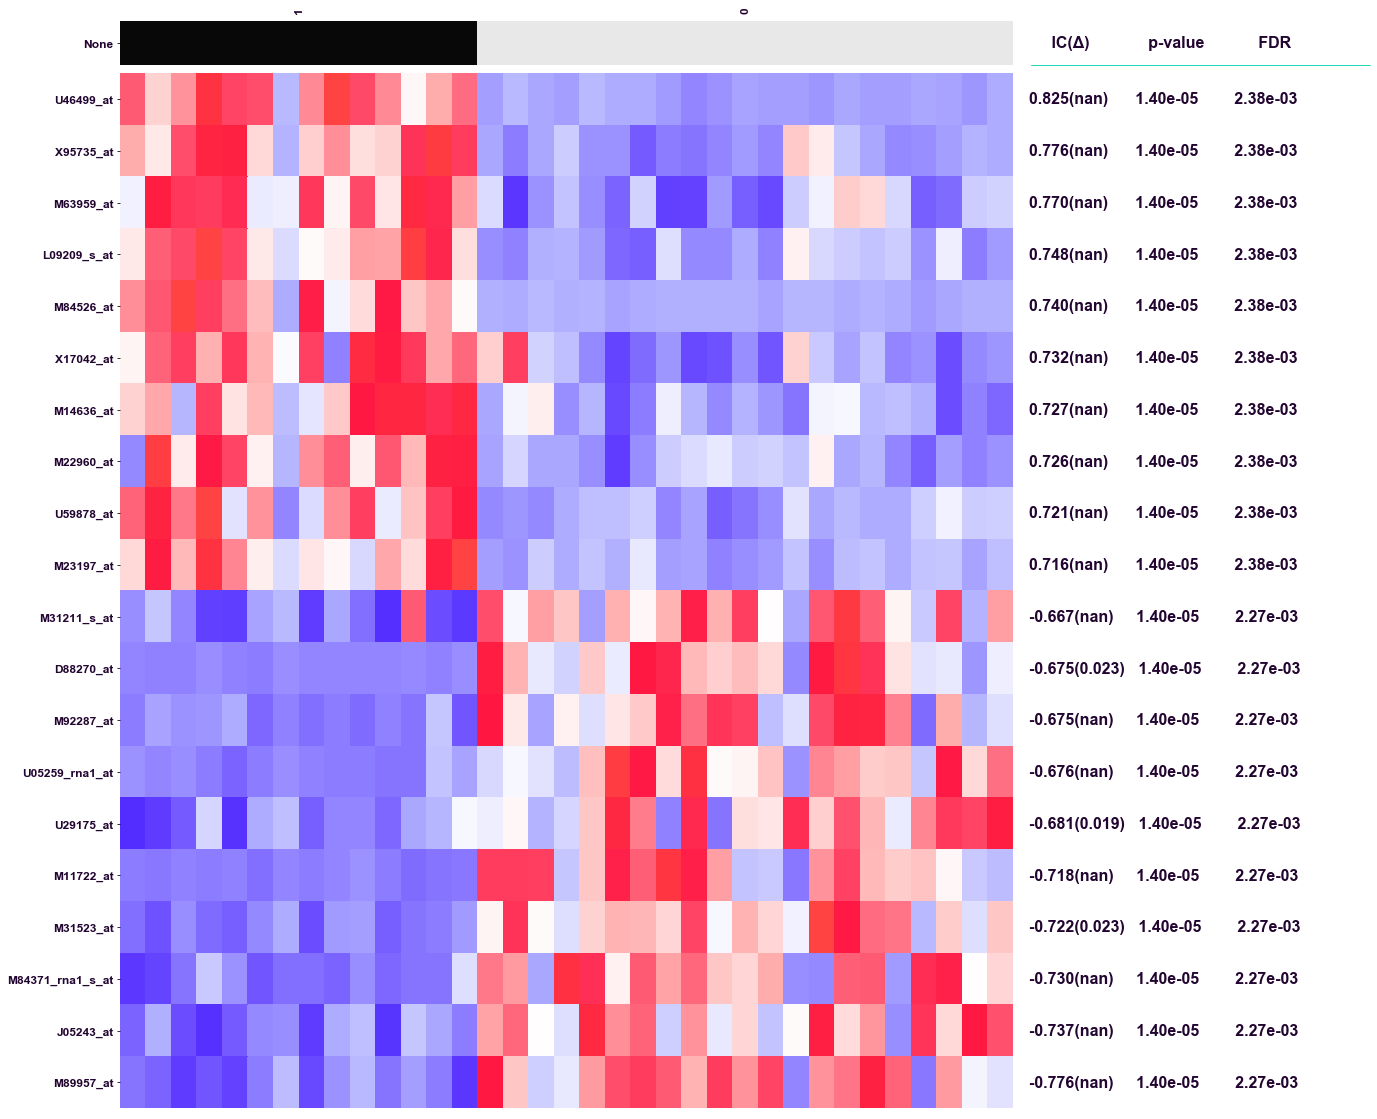

CPU times: user 2.7 s, sys: 186 ms, total: 2.89 s
Wall time: 9.34 s


<IPython.core.display.Javascript object>

In [21]:
%%notify
%%time
raw_scores = differential_gene_expression(phenotypes=pheno_url, gene_expression=data_url, 
                                      output_filename='DE_test', ranking_method=cusca.custom_pearson_corr,
                                      number_of_permutations=10)

In [22]:
ccal_scores = raw_scores.copy()
ccal_scores['abs_score'] = abs(ccal_scores['Score'])
ccal_scores['Feature'] = ccal_scores.index
ccal_scores.sort_values('abs_score', ascending=False, inplace=True)
ccal_scores.reset_index(inplace=True)
ccal_scores['Rank'] = ccal_scores.index +1
print(ccal_scores)

                   Name         Score   0.95 MoE   p-value       FDR  \
0             U46499_at  8.245435e-01        NaN  0.000014  0.002381   
1             X95735_at  7.756710e-01        NaN  0.000014  0.002381   
2             M89957_at -7.756137e-01        NaN  0.000014  0.002273   
3             M63959_at  7.696607e-01        NaN  0.000014  0.002381   
4           L09209_s_at  7.475753e-01        NaN  0.000014  0.002381   
5             M84526_at  7.400529e-01        NaN  0.000014  0.002381   
6             J05243_at -7.371616e-01        NaN  0.000014  0.002273   
7             X17042_at  7.316505e-01        NaN  0.000014  0.002381   
8      M84371_rna1_s_at -7.298155e-01        NaN  0.000014  0.002273   
9             M14636_at  7.268337e-01        NaN  0.000014  0.002381   
10            M22960_at  7.260735e-01        NaN  0.000014  0.002381   
11            M31523_at -7.221959e-01  0.0228747  0.000014  0.002273   
12            U59878_at  7.209896e-01        NaN  0.000014  0.00

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x114d3cc80> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	2/10 ...
	3/10 ...
	4/10 ...
	5/10 ...
	6/10 ...
	7/10 ...
	8/10 ...
	9/10 ...
	10/10 ...
	10/10 - done.


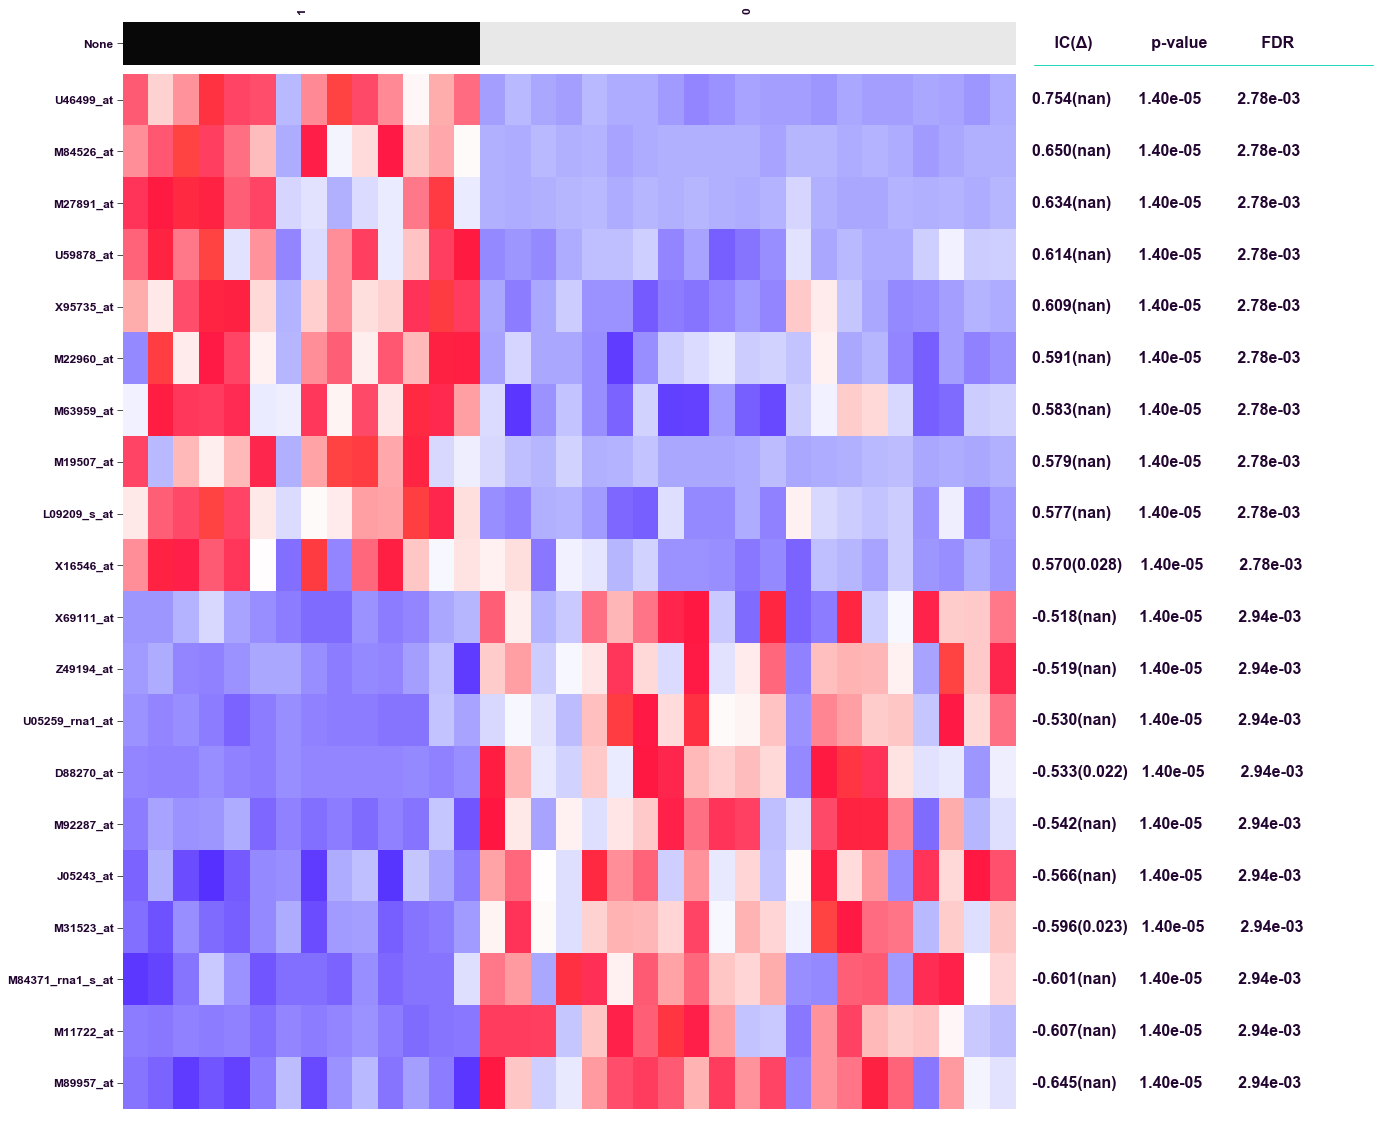

<IPython.core.display.Javascript object>

CPU times: user 3.14 s, sys: 188 ms, total: 3.33 s
Wall time: 1min 40s


In [23]:
%%time
%%notify
raw_ic_scores = differential_gene_expression(phenotypes=pheno_url, gene_expression=data_url, 
                                      output_filename='DE_test', ranking_method=cusca.compute_information_coefficient,
                                      number_of_permutations=10)

In [25]:
ccal_ic_scores = raw_ic_scores.copy()
ccal_ic_scores['abs_score'] = abs(ccal_ic_scores['Score'])
ccal_ic_scores['Feature'] = ccal_ic_scores.index
ccal_ic_scores.sort_values('abs_score', ascending=False, inplace=True)
ccal_ic_scores.reset_index(inplace=True)
ccal_ic_scores['Rank'] = ccal_ic_scores.index +1
print(ccal_ic_scores)

                  Name     Score   0.95 MoE   p-value       FDR  abs_score  \
0            U46499_at  0.753714        NaN  0.000014  0.002778   0.753714   
1            M84526_at  0.649866        NaN  0.000014  0.002778   0.649866   
2            M89957_at -0.645258        NaN  0.000014  0.002941   0.645258   
3            M27891_at  0.634431        NaN  0.000014  0.002778   0.634431   
4            U59878_at  0.613581        NaN  0.000014  0.002778   0.613581   
5            X95735_at  0.608938        NaN  0.000014  0.002778   0.608938   
6            M11722_at -0.607143        NaN  0.000014  0.002941   0.607143   
7     M84371_rna1_s_at -0.601197        NaN  0.000014  0.002941   0.601197   
8            M31523_at -0.596433  0.0230147  0.000014  0.002941   0.596433   
9            M22960_at  0.591253        NaN  0.000014  0.002778   0.591253   
10           M63959_at  0.583427        NaN  0.000014  0.002778   0.583427   
11           M19507_at  0.579449        NaN  0.000014  0.002778 

# Comparing results

### CMS vs CCAL_correlation

In [26]:
# @memory.cache
def custom_metric(list_1, list_2):
    temp = list_1 - list_2
    temp.fillna(len(temp), inplace=True)
    # Metric is 0 if perfect overlap, 1 if list are reversed. It can be larger than one!
    return sum(abs(temp))/ np.floor(list_1.shape[0]**2/2)

In [29]:
# @memory.cache
def map_df1_to_df2(df_1, df_2):
    to_return = df_1.copy()
    df_2_copy = df_2.copy()
    
    to_return.sort_values(by='Rank', inplace=True)
    to_return.set_index('Feature', inplace=True)
    df_2_copy.sort_values(by='Rank', inplace=True)
    df_2_copy.set_index('Feature', inplace=True)
    
    df_2_copy.rename(columns={'Rank': 'new_Rank'}, inplace=True)
    to_return_2 = to_return.join(df_2_copy)
    
    return to_return_2

In [36]:
def compute_overlap(reference_df, new_df, col='index'):
    if col == 'index':
        common = (list(set(reference_df.index) & set(new_df.index)))
    else:
        common = (list(set(reference_df[col]) & set(new_df[col])))

    overlap = 100*len(common)/len(reference_df)
    return overlap

In [41]:
# @memory.cache
def compare_ranks(df_a, df_b, number_of_genes=5, verbose=False):
    # Not ssuming both df's are ranked already!
    subset_a = df_a.head(number_of_genes)[['Feature', 'Rank']]
    subset_b = df_b.head(number_of_genes)[['Feature', 'Rank']]

    a_in_b = map_df1_to_df2(subset_a, df_b[['Feature','Rank']])
    b_in_a = map_df1_to_df2(subset_b, df_a[['Feature','Rank']]) 

    metric_1 = custom_metric(a_in_b['Rank'], a_in_b['new_Rank'])
    metric_2 = custom_metric(b_in_a['Rank'], b_in_a['new_Rank'])
    
    overlap = compute_overlap(subset_a, subset_b, col='Feature')
    
    if verbose:
        print(a_in_b) 
        print(b_in_a)
        
    return ((metric_1 + metric_2)/2, overlap)

In [37]:
# @memory.cache
def compare_multiple_ranks(df_a, df_b, max_number_of_genes=10, verbose=False):

    # This is the largest subset we will consider
    subset_a = df_a.head(max_number_of_genes)[['Feature', 'Rank']]
    subset_b = df_b.head(max_number_of_genes)[['Feature', 'Rank']]
    
    df_a_to_use = df_a[['Feature','Rank']]
    df_b_to_use = df_b[['Feature','Rank']]
    
    indexes = []
    metrics = []
    overlap = []
    for i in range(max_number_of_genes, 0, -1):
        
        if i == max_number_of_genes:
            subset_a_to_use = subset_a
            subset_b_to_use = subset_b
        else:
            subset_a_to_use = subset_a_to_use.drop(subset_a_to_use.index[i])
            subset_b_to_use = subset_b_to_use.drop(subset_b_to_use.index[i])

        a_in_b = map_df1_to_df2(subset_a_to_use, df_b_to_use)
        b_in_a = map_df1_to_df2(subset_b_to_use, df_a_to_use)
        
        overlap.append(compute_overlap(subset_a_to_use, subset_b_to_use, col='Feature'))

        metric_1 = custom_metric(a_in_b['Rank'], a_in_b['new_Rank'])
        metric_2 = custom_metric(b_in_a['Rank'], b_in_a['new_Rank'])
        
        indexes.append(i)
#         print(i, metric_1, metric_2)
        metrics.append((metric_1 + metric_2)/2)
    
    if verbose:
        print('Depreciated!')
        
    return indexes, metrics, overlap

In [48]:
%%time
ixs, mets, over = compare_multiple_ranks(cms_scores, ccal_scores, max_number_of_genes=5, verbose=False)
print(ixs)
print(mets)
print(over)

[5, 4, 3, 2, 1]
[2.875, 3.0625, 4.375, 5.5, inf]
[20.0, 25.0, 33.333333333333336, 0.0, 0.0]
CPU times: user 51.7 ms, sys: 2.46 ms, total: 54.2 ms
Wall time: 52.9 ms


/Users/edjuaro/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


In [47]:
%%time
m1, ov = compare_ranks(cms_scores, ccal_ic_scores, number_of_genes=10, verbose=True)
print("\nMetric =",m1, "Overlap=", ov)

                  Rank  new_Rank
Feature                         
M89957_at            1         3
J05243_at            2        16
M11722_at            3         7
M31523_at            4         9
M84371_rna1_s_at     5         8
U46499_at            6         1
D88270_at            7        25
U05259_rna1_at       8        27
M92287_at            9        23
M63959_at           10        11
                  Rank  new_Rank
Feature                         
U46499_at            1         6
M84526_at            2        30
M89957_at            3         1
M27891_at            4        52
U59878_at            5        40
X95735_at            6        12
M11722_at            7         3
M84371_rna1_s_at     8         5
M31523_at            9         4
M22960_at           10        34

Metric = 2.45 Overlap= 50.0
CPU times: user 15.4 ms, sys: 2.4 ms, total: 17.8 ms
Wall time: 15.8 ms


### CMS vs CCAL_ic

### CCAL_correlation vs CCAL_ic

## Plotting trends

### CMS vs CCAL_ic

In [94]:
%%time
plt.clf()
fig, axs = plt.subplots(2,1,dpi=150)

# for i in range(int(len(scores)/2)):
# for i in range(1000):
#     if i ==0:
#         continue
#     metric = compare_ranks(cms_scores, ccal_ic_scores, number_of_genes=i)
#     fig.gca().scatter(i,metric,color='k')
# fig.gca().set_ylim(-0.1,8)

ixs, mets,over = compare_multiple_ranks(cms_scores, ccal_ic_scores, max_number_of_genes=500, verbose=False)
axs[0].scatter(ixs,mets,color='k')
axs[0].set_ylim(-0.1,8)
axs[0].set_ylabel('Custom metric')
axs[1].scatter(ixs,over,color='k')
axs[1].set_ylabel('% Overlap')
axs[1].set_xlabel('Top n genes')
axs[0].set_title("CMS vs CCAL_IC")
fig

CPU times: user 4.07 s, sys: 52 ms, total: 4.13 s
Wall time: 4.13 s


/Users/edjuaro/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


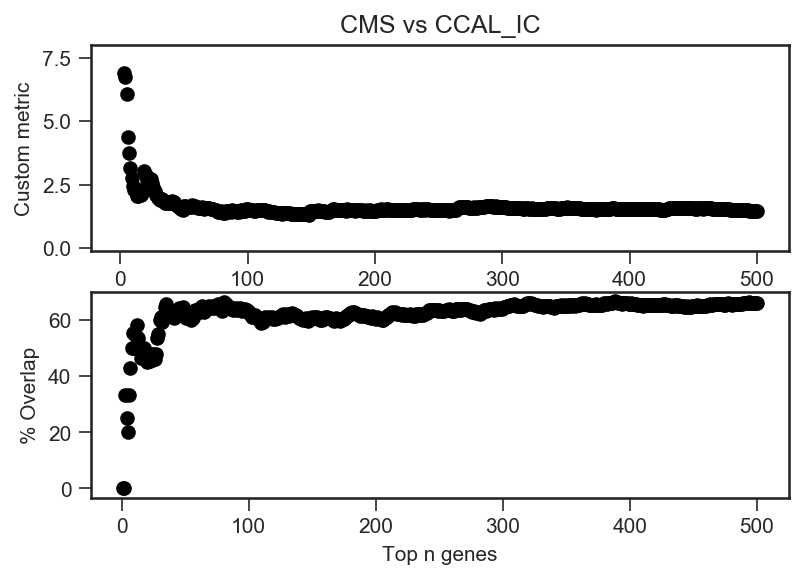

In [95]:
fig

### CMS vs CCAL_correlation

In [96]:
%%time
plt.close('all')
plt.clf()
fig2, axs2 = plt.subplots(2,1,dpi=150)

# for i in range(int(len(scores)/2)):
# for i in range(1000):
#     if i ==0:
#         continue
#     metric = compare_ranks(cms_scores, ccal_scores, number_of_genes=i)
#     fig2.gca().scatter(i,metric,color='k')
ixs, mets, over = compare_multiple_ranks(cms_scores, ccal_scores, max_number_of_genes=100, verbose=False)
axs2[0].scatter(ixs,mets,color='k')
axs2[0].set_ylim(-0.1,8)
axs2[0].set_ylabel('Custom metric')
axs2[1].scatter(ixs,over,color='k')
axs2[1].set_ylabel('% Overlap')
axs2[1].set_xlabel('Top n genes')
axs2[0].set_title("CMS vs CCAL_PC")

CPU times: user 812 ms, sys: 13.6 ms, total: 826 ms
Wall time: 823 ms


/Users/edjuaro/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


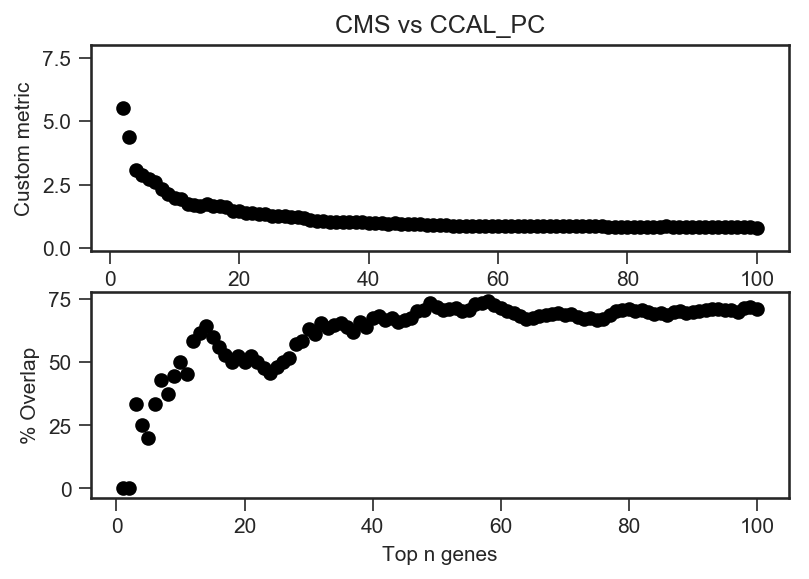

In [97]:
fig2

### CCAL_correlation vs CCAL_ic

In [90]:
%%time
fig3, axs3 = plt.subplots(2,1,dpi=150)
# for i in range(int(len(scores)/2)):
# for i in range(1000):
#     if i ==0:
#         continue
#     metric = compare_ranks(ccal_ic_scores, ccal_scores, number_of_genes=i)
#     fig2.gca().scatter(i,metric,color='k')
# fig2.gca().set_ylim(-0.1,8)
ixs, mets, over = compare_multiple_ranks(ccal_ic_scores, ccal_scores, max_number_of_genes=100, verbose=False)
axs3[0].scatter(ixs,mets,color='k')
axs3[0].set_ylim(-0.1,8)
axs3[0].set_ylabel('Custom metric')
axs3[1].scatter(ixs,over,color='k')
axs3[1].set_ylabel('% Overlap')
axs3[1].set_xlabel('Top n genes')

CPU times: user 977 ms, sys: 14.6 ms, total: 992 ms
Wall time: 991 ms


/Users/edjuaro/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


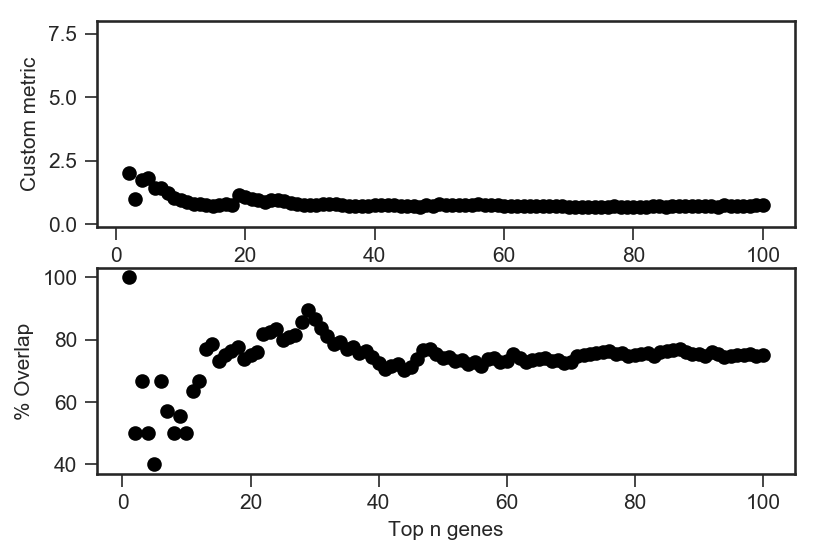

In [91]:
fig3